# D1. LINEAR REGRESSION WITHOUT OUTLIERS

__1.1 Importing Libraries and Datasets__

__1.2 Linear Regression__

__1.3 Model Evaluation : Training Metrics__

__1.4 Model Evaluation : Cross Validation__

__1.5 Model Evaluation : Test Dataset__

__1.6 Feature Importances__

__1.7 Residuals' Distribution__

__1.8 Scatterplots with fitted line (Train Dataset)__

__1.9 Saving Results__

## 1.1 Importing Libraries and Datasets

In [1]:
# Libraries

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

import shap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

In [2]:
# Train Dataset

train_data = pd.read_csv("BG_Train_Dataset_No_Outliers.csv") 
train_df = train_data.copy()
train_df.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA,Post Operative Glucose
0,3.321,4.427,1.574,5.794,8.838,1,1,1,2,129


In [3]:
# Obtaining the train dataframe shape 

train_df.shape

(200, 10)

In [4]:
# Test Dataset

test_data = pd.read_csv("BG_Test_Dataset_No_Outliers.csv") 
test_df = test_data.copy()
test_df.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA,Post Operative Glucose
0,3.728,5.596,0.0,7.543,8.058,0,0,2,2,115


In [5]:
# Obtaining the test dataframe shape 

test_df.shape

(30, 10)

## 1.2 Linear Regression

In [6]:
# Defining X_train and Y_train

Y_train = train_df['Post Operative Glucose']
X_train = train_df.drop('Post Operative Glucose', axis = 1)
X_train.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA
0,3.321,4.427,1.574,5.794,8.838,1,1,1,2


In [7]:
# Adding constant

X_train_with_constant = sm.add_constant(X_train)
X_train_with_constant.head(1)

,const,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA
0,1.0,3.321,4.427,1.574,5.794,8.838,1,1,1,2


In [8]:
# Fitting the model and printing summary

MLRmodel = sm.OLS(Y_train, X_train_with_constant).fit()
print(MLRmodel.summary())

                              OLS Regression Results                              
Dep. Variable:     Post Operative Glucose   R-squared:                       0.480
Model:                                OLS   Adj. R-squared:                  0.455
Method:                     Least Squares   F-statistic:                     19.45
Date:                    Tue, 23 Jul 2024   Prob (F-statistic):           7.04e-23
Time:                            15:42:31   Log-Likelihood:                -873.67
No. Observations:                     200   AIC:                             1767.
Df Residuals:                         190   BIC:                             1800.
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

## 1.3 Model Evaluation : Training Metrics

In [9]:
# Getting predictions and training error metrics 

MLRpredictions = MLRmodel.predict(X_train_with_constant)

MLR_Tr_MAE = np.round(mean_absolute_error(Y_train, MLRpredictions),2)

In [10]:
# Dictionary that holds the information of R^2, adjusted R^2, F-statistic value, number of predictors 
# and training error metric values 

dict1 = {'Linear Regression': (np.round(MLRmodel.rsquared,3),np.round(MLRmodel.rsquared_adj,3), 
                 np.round(MLRmodel.fvalue,2), 
                 np.round(len(X_train.columns),3),
                 MLR_Tr_MAE)}

In [11]:
# Creating a dataframe to easily present the results 

Training_metric_df = pd.DataFrame(dict1, index=['R^2','adj.R^2','F-stat', 
                                               'Num_of_Feats', 'Tr_MAE'])

In [12]:
# Displaying the training evaluation metrics

Training_metric_df

,Linear Regression
R^2,0.480
adj.R^2,0.455
F-stat,19.450
Num_of_Feats,9.000
Tr_MAE,15.270


## 1.4 Model Evaluation : Cross Validation

In [13]:
# Using the KFold function for cross-validation

cv = KFold(n_splits = 5, shuffle = True, random_state = 126)

In [14]:
# Function that calculates the cross validated test MAE 

def cv_scores(X,Y, model,cv):
        
    cv_MAE = round(np.mean(cross_val_score(model, X, Y, cv=cv, 
                                       scoring='neg_mean_absolute_error', 
                                           error_score='raise') * (-1)),2)

    
    score = cv_MAE
    return score

In [15]:
# Dictionary that holds the information of the cross validated test MAE 

dict2 = {'Linear Regression':cv_scores(X_train,Y_train,LinearRegression(),cv)}

In [16]:
# Creating a dataframe to easily present the results 

Test_CV_results = pd.DataFrame(dict2, index=['Te_MAE (KFold)'])

In [17]:
# Displaying the cross validated test error results

Test_CV_results

,Linear Regression
Te_MAE (KFold),16.06


## 1.5 Model Evaluation : Test Dataset

In [18]:
# Defining X_test and Y_test

Y_test = test_df['Post Operative Glucose']
X_test = test_df.drop('Post Operative Glucose', axis = 1)
X_test.head(1)

,Age,BMI,Smoking,Pre Operative Fast,Pre Operative Glucose,Sex,Cort,LV,ASA
0,3.728,5.596,0.0,7.543,8.058,0,0,2,2


In [19]:
# Adding constant

X_test_with_constant = sm.add_constant(X_test)

In [20]:
# Getting predictions

MLR_predictions = MLRmodel.predict(X_test_with_constant)

In [21]:
# Getting Test Metrics

MLR_Te_MAE = round(mean_absolute_error(Y_test, MLR_predictions),2)

In [22]:
# Dictionary that holds the information of test MAE 

dict3 = {'Linear Regression':[MLR_Te_MAE]}

In [23]:
# Creating a dataframe to easily present the results 

Test_Dat_results = pd.DataFrame(dict3, index=['Te_MAE'])

In [24]:
# Displaying the test error results

Test_Dat_results

,Linear Regression
Te_MAE,19.3


## 1.6 Feature Importances

In [25]:
# load JS visualization code to notebook

shap.initjs()

In [26]:
# Instantiating and fitting the model 

model = LinearRegression()
model.fit(X_train, Y_train);

In [27]:
# Creating the explainer

explainer = shap.LinearExplainer(model, X_train)

In [28]:
# Calculate Shapley values for the data

shap_values = explainer(X_train)

In [29]:
# Picking a color for the graphs

color = 'red'

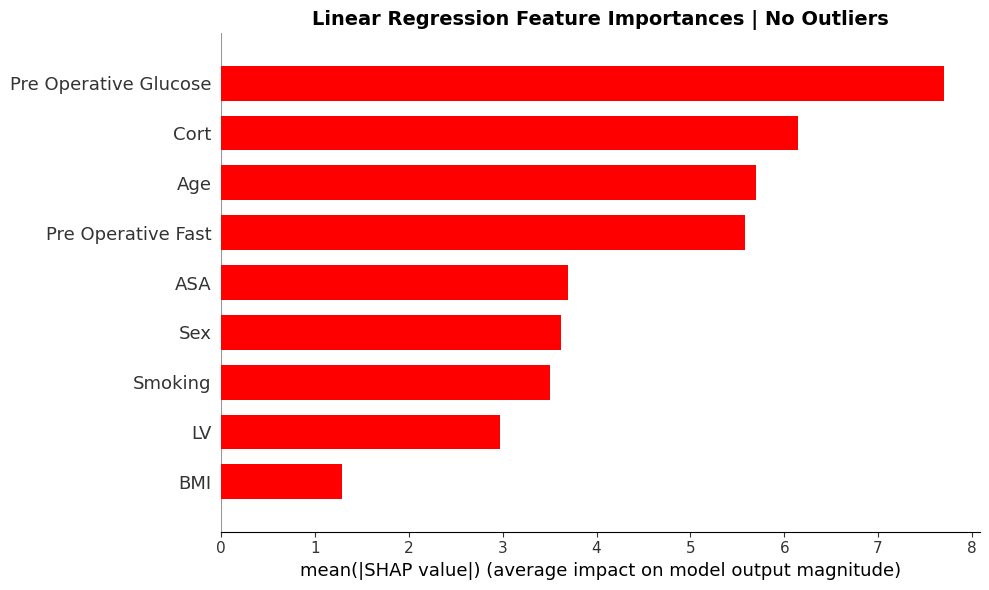

In [30]:
# Summary plot to visualize feature importance

plt.title(label = "Linear Regression Feature Importances | No Outliers" , fontsize = 14, weight = 'bold')

shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, 
                  plot_type='bar', 
                  color=color , plot_size= (10,6), show_values_in_legend = True)

plt.show()

## 1.7 Residuals' Distribution

In [31]:
# model fitted values

fitted_y1 = MLRmodel.fittedvalues

# model residuals
residuals1 = MLRmodel.resid

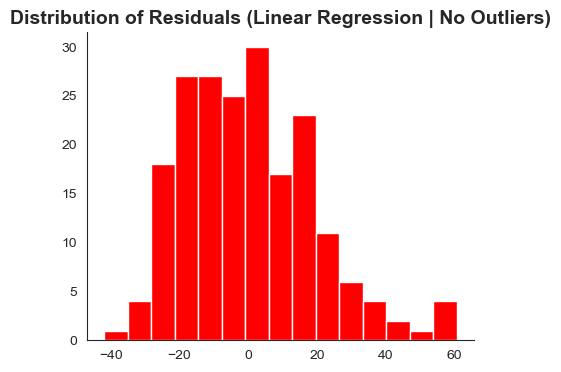

In [32]:
# Histogram of residuals 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals1, bins = 15, color = color)
    
plt.title(label = "Distribution of Residuals (Linear Regression | No Outliers)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

## 1.8 Scatterplots with fitted line (Train Dataset)

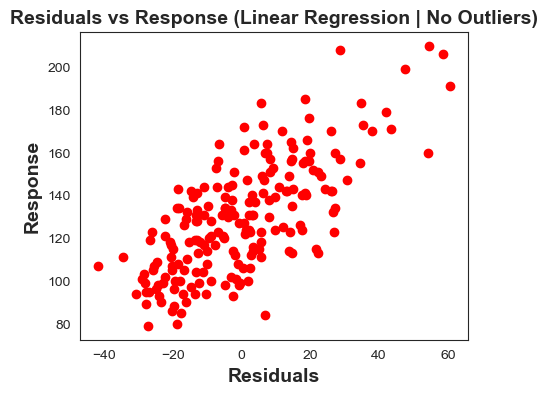

In [33]:
# Plotting residuals vs response 

sns.set_style("white")

plt.figure(figsize=(5,4))

plt.plot(residuals1, Y_train, 'o', color = color)

# Uncomment the following lines to add a fitted line 
# b,a = np.polyfit(residuals1, Y_train, 1)

# plt.plot(residuals1, b*residuals1 + a, color = 'black')

plt.title(label = 'Residuals vs Response (Linear Regression | No Outliers)', fontsize = 14, weight = 'bold')
plt.xlabel('Residuals',fontsize = 14, weight = 'bold')
plt.ylabel('Response',fontsize = 14, weight = 'bold')

plt.show()

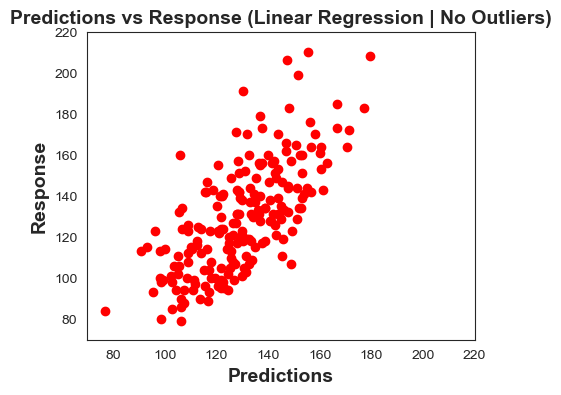

In [34]:
# Plotting predictions vs response 

sns.set_style("white")

plt.figure(figsize=(5,4))

plt.plot(MLRpredictions, Y_train, 'o', color = color)

# Uncomment the following lines to add a fitted line
# b,a = np.polyfit(MLRpredictions, Y_train, 1)

# plt.plot(MLRpredictions, b*MLRpredictions + a, color = 'black')

plt.title(label = 'Predictions vs Response (Linear Regression | No Outliers)', fontsize = 14, weight = 'bold')
plt.xlabel('Predictions',fontsize = 14, weight = 'bold')
plt.ylabel('Response',fontsize = 14, weight = 'bold')

plt.xlim(70, 220)
plt.ylim(70, 220)

plt.show()

## 1.9 Saving Results

In [35]:
# Concatenating the training and test Dataframes

LinearModelsResults = pd.concat([Training_metric_df, Test_CV_results,Test_Dat_results], axis =  0)
LinearModelsResults

,Linear Regression
R^2,0.480
adj.R^2,0.455
F-stat,19.450
Num_of_Feats,9.000
Tr_MAE,15.270
Te_MAE (KFold),16.060
Te_MAE,19.300


In [36]:
# Saving the Results

LinearModelsResults.to_csv(r'LinearModelsResultsNoOutliers.csv', index=True, index_label = 'Metric')